#Project - PDF Genie
- A magical bot that reads your files and gives smart answers!

Let's learn **RAG (Retrieval-Augmented Generation)** like you're a 5-year-old genius with a coding cape 🦸‍♂️

We'll break it down into **toys, games, and tiny magic spells (code)**

---

## 🧠 What is RAG?

**Imagine this:**

You have:

* 🗂️ A *library* full of books (your documents)
* 🤖 A *robot friend* who can answer your questions
* BUT — the robot has a tiny brain (limited memory) 😵

So what do you do?

✅ You teach the robot to **look up facts** from the books (retrieve info)
✅ Then use those facts to **form a smart answer** (generate response)

That’s **RAG**:
**R**etrieval + **A**ugmented (helped by) + **G**eneration

---

## 📦 Tools You Need (in Python, like toy blocks)

| Tool                              | Purpose                                               |
| --------------------------------- | ----------------------------------------------------- |
| `LangChain`                       | To connect everything                                 |
| `FAISS` or `Chroma`               | To store/search your documents like a smart librarian |
| `OpenAI`                          | To generate smart responses using LLM                 |
| `PyPDFLoader`, `TextLoader`, etc. | To load books or text                                 |

---


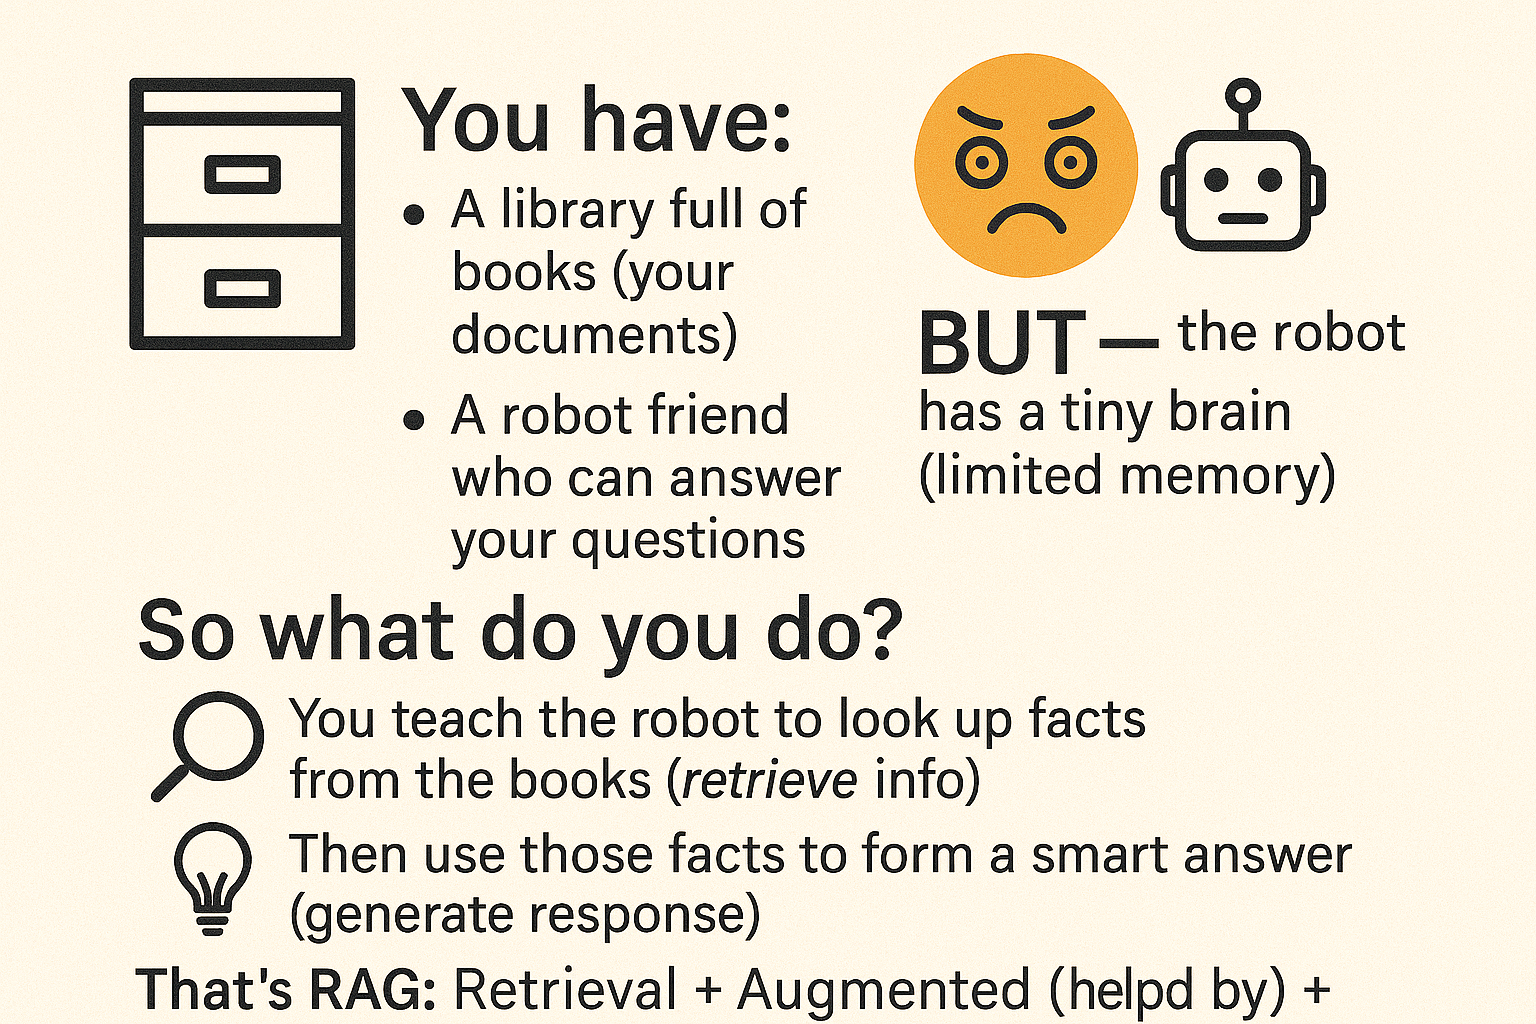

#🔧 1. Install Tools (Just once)


* **`langchain`** – Framework for building apps with LLMs (e.g. chatbots, QA systems).
* **`openai`** – Access to OpenAI models like GPT.
* **`faiss-cpu`** – Facebook AI Similarity Search (CPU version) for vector-based search/indexing.
* **`tiktoken`** – Tokenizer used to count tokens for OpenAI models.
* **`PyPDF2`** – Library to read and extract text from PDF files.



In [ ]:
!pip install langchain openai faiss-cpu tiktoken PyPDF2

In [ ]:
# Install or upgrade the langchain-community package
# This adds extra tools and integrations for LangChain
pip install -U langchain-community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 44.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 2.9 MB/s eta 0:00:00


#📄 2. Load a PDF

In [ ]:
pip install pypdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.5/305.5 kB 7.8 MB/s eta 0:00:00


In [ ]:
# Import the PDF loader from LangChain
from langchain.document_loaders import PyPDFLoader

# Load the PDF file (replace with your own file path)
loader = PyPDFLoader("/content/PRATAP JADHAVDS .pdf") # Upload your own file here ex- your_notes.pdf

# Read and split the PDF into pages
pages = loader.load()


In [ ]:
pages

[Document(metadata={'producer': 'PyPDF', 'creator': 'Microsoft Word', 'creationdate': '2025-06-28T03:19:29-07:00', 'author': 'pratap jadhav', 'moddate': '2025-06-28T03:19:29-07:00', 'source': '/content/PRATAP JADHAVDS .pdf', 'total_pages': 5, 'page': 0, 'page_label': '1'}, page_content='PRATAP JADHAV  \n Email: pratap.jadhav0@gmail.com  \n Mobile: +91 8951483498  \n Experience: 3.6 Years \n____________________________________________________________________________________ \nPROFESSIONAL SUMMARY  \n• 3.6 years of hands-on experience in the Data Science and Machine Learning domain, \nworking on real-world AI/ML projects involving end-to-end development and \ndeployment. \n• Currently working as a ‘Data Scientist’ at “DotandDash Technologies”. \n• Practical exposure in Machine Learning, Deep Learning and Data Engineering \nconcepts. \n• Hands-on experience in building and maintaining ETL pipelines for data extraction, \ntransformation, and loading using Python, SQL and cloud-based storag

#🧠 3. Split Text for Indexing

In [ ]:
# Import the text splitter from LangChain
from langchain.text_splitter import RecursiveCharacterTextSplitter

# Create a splitter to break text into chunks (500 characters each, with 50 characters overlapping)
splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=50)

# Split the PDF pages into smaller text chunks
docs = splitter.split_documents(pages)


In [ ]:
splitter

In [ ]:
docs

[Document(metadata={'producer': 'PyPDF', 'creator': 'Microsoft Word', 'creationdate': '2025-06-28T03:19:29-07:00', 'author': 'pratap jadhav', 'moddate': '2025-06-28T03:19:29-07:00', 'source': '/content/PRATAP JADHAVDS .pdf', 'total_pages': 5, 'page': 0, 'page_label': '1'}, page_content='PRATAP JADHAV  \n Email: pratap.jadhav0@gmail.com  \n Mobile: +91 8951483498  \n Experience: 3.6 Years \n____________________________________________________________________________________ \nPROFESSIONAL SUMMARY  \n• 3.6 years of hands-on experience in the Data Science and Machine Learning domain, \nworking on real-world AI/ML projects involving end-to-end development and \ndeployment. \n• Currently working as a ‘Data Scientist’ at “DotandDash Technologies”.'),
 Document(metadata={'producer': 'PyPDF', 'creator': 'Microsoft Word', 'creationdate': '2025-06-28T03:19:29-07:00', 'author': 'pratap jadhav', 'moddate': '2025-06-28T03:19:29-07:00', 'source': '/content/PRATAP JADHAVDS .pdf', 'total_pages': 5, 'p

In [ ]:
pip install -U langchain-openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.4/70.4 kB 2.9 MB/s eta 0:00:00


#📚 4. Store in FAISS (the brain)

In [ ]:
''''from sentence_transformers import SentenceTransformer

model = SentenceTransformer("all-MiniLM-L6-v2")  # Free, no API key needed
embedding = model.encode(["This is your candy text!"])
''''

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
# Import FAISS for vector storage and OpenAI for embeddings
from langchain_openai import OpenAIEmbeddings
from langchain.vectorstores import FAISS

# ✅ Pass API key directly or set it as an environment variable
import os
os.environ["OPENAI_API_KEY"] = "your-api-key-here"  # optional if using env vars

# Create OpenAI embeddings for the text chunks
embeddings = OpenAIEmbeddings(openai_api_key="your-api-key-here")  # or omit if using env var

# Store the text chunks and their embeddings in a FAISS vector database
db = FAISS.from_documents(docs, embeddings)


AuthenticationError: Error code: 401 - {'error': {'message': 'Incorrect API key provided: your-api*****here. You can find your API key at https://platform.openai.com/account/api-keys.', 'type': 'invalid_request_error', 'param': None, 'code': 'invalid_api_key'}}

#🤖 5. Create the QA Chain (RAG magic happens here)

In [ ]:
# Import RetrievalQA for question-answering
from langchain.chains import RetrievalQA
# Import ChatOpenAI to use GPT model
from langchain.chat_models import ChatOpenAI

# Create a language model using GPT-3.5
llm = ChatOpenAI(model="gpt-3.5-turbo")

# Set up QA system with the model and retriever
qa = RetrievalQA.from_chain_type(llm=llm, retriever=db.as_retriever())

/tmp/ipython-input-20-328640433.py:7: LangChainDeprecationWarning: The class `ChatOpenAI` was deprecated in LangChain 0.0.10 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import ChatOpenAI``.
  llm = ChatOpenAI(model="gpt-3.5-turbo")


NameError: name 'db' is not defined

#💬 6. Ask a Question

In [ ]:
question = "What is RAG in NLP?"  # Define the question to ask
response = qa.run(question)  # Get the answer from the QA system
print("Answer:", response)  # Print the answer

___________________

#🎯 Project: "Ask My Candy Sheet!"

#🪄 Extract Text from PDF

In [ ]:
pip install fitz

In [ ]:
!pip install pymupdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 68.8 MB/s eta 0:00:00


In [ ]:
import fitz # Import the PyMuPDF library

doc = fitz.open("/content/PRATAP JADHAVDS .pdf")  # Open the PDF file

text = ""  # Create an empty string to store text

for page in doc:  # Loop through each page in the PDF
    text += page.get_text()  # Add the text from the page to the string

#2. Split Text into Chunks

In [ ]:
# Import the text splitter
from langchain.text_splitter import RecursiveCharacterTextSplitter

# Create a text splitter with chunk size 300 and 50 characters overlap
splitter = RecursiveCharacterTextSplitter(chunk_size=300, chunk_overlap=50)

# Split the text into smaller chunks (documents)
docs = splitter.create_documents([text])


#3. Get Free Embeddings

In [ ]:
# Import the sentence transformer model
from sentence_transformers import SentenceTransformer

# Load a pre-trained sentence embedding model
model = SentenceTransformer("all-MiniLM-L6-v2")

# Create embeddings for each text chunk
doc_embeddings = [model.encode([doc.page_content])[0] for doc in docs]


#4. Store in FAISS

In [ ]:
import faiss  # Import FAISS for similarity search
import numpy as np  # Import NumPy for array handling

index = faiss.IndexFlatL2(384)  # Create a FAISS index for 384-dim vectors (MiniLM output size)
index.add(np.array(doc_embeddings))  # Add the document embeddings to the index

#5. Ask a Question!

In [ ]:
question = "What is the full name?"  # Define the question
q_embed = model.encode([question])  # Convert the question to an embedding

# Search the FAISS index for the closest match (k=1 means top 1 result)
D, I = index.search(np.array(q_embed), k=1)

# Print the most relevant chunk of text
print(docs[I[0][0]].page_content)

____________________________________________________________________________________ 
EDUCATIONAL SUMMARY: 
 
B.Com – College of Science & Commerce, Mar 2018 
 
PERSONAL DETAILS: 
 
Name  
 
: Pratapshingh jadhav 
Email  
 
: pratap.jadhav0@gmail.com 
Languages Known  : English, Hindi, Marathi
